<a href="https://colab.research.google.com/github/Youtoi/nitp-intership-sharique-habib-/blob/main/HANDWRITTEN_RECOGNISE_PREDICTION_(sharique_habib)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [4]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
X_train.shape# 60000 image..where each image contain 28x28 pixels

(60000, 28, 28)

In [7]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
X_test.shape

(10000, 28, 28)

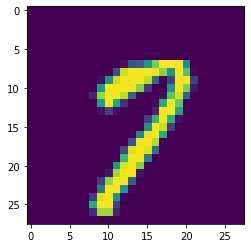

In [44]:
import matplotlib.pyplot as plt
#plt.imshow(X_train[0])
#plt.imshow(X_train[1])
plt.imshow(X_train[9999])

In [11]:
#now we are firstly making our array b/w 0 -1 ..so that convergence become fast..so dividing each value with maximum value to get this in range of 0-1

In [12]:
X_train=X_train/255
X_test=X_test/255

In [13]:
model=Sequential()
#now we need to flatten the 28x28 data which is now in 2D so flattening the 2D DATA in one row 
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
#using softmax since we have more than one node in the output
model.add(Dense(10,activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
#categorical_crossentropy- need to encode labels by one hot encoding
#sparse_categorical_crossentropy- need not to encode labels by one hot encoding automatically being encoded
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [33]:
history=model.fit(X_train,y_train, epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.1548 - val_accuracy: 0.9787
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 8.0207e-04 - accuracy: 0.9998 - val_loss: 0.1494 - val_accuracy: 0.9783
Epoch 3/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.2110 - val_accuracy: 0.9718
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0042 - accuracy: 0.9984 - val_loss: 0.1575 - val_accuracy: 0.9788
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.1521 - val_accuracy: 0.9780
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.1586 - val_accuracy: 0.9769
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0055 - accuracy: 0.9981 - val_loss: 0.1590 - val_accur

In [34]:
y_prob=model.predict(X_test)

In [35]:
y_pred=y_prob.argmax(axis=1)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9741

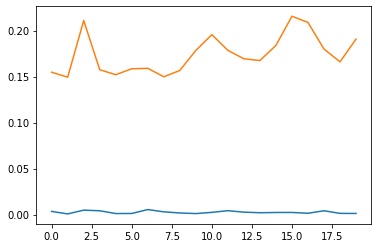

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

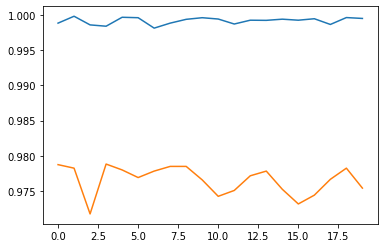

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [39]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [40]:
model.predict(X_test[1000].reshape(1,28,28)).argmax(axis=1)

array([9])

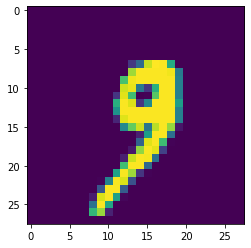

In [42]:
plt.imshow(X_test[1000])#predicted image